In [1]:
from fastai.vision.all import *

In [2]:
path= untar_data(URLs.PETS)/'images'

In [3]:
files= get_image_files(path) # 이미지파일들의 이름을 모두 복붙하여 리스트를 만든뒤에 files.txt로 저장하는 과정으로 비유할 수 있음

In [13]:
print(files[5]) #txt 파일의 5번째 목록

C:\Users\user\.fastai\data\oxford-iiit-pet\images\Abyssinian_103.jpg


In [5]:
def label_func(f):
    if f[0].isupper():
        return 'cat'
    else:
        return 'dog'

In [6]:
label_func('abc')

'dog'

In [7]:
dls=ImageDataLoaders.from_name_func(path,files,label_func,item_tfms=Resize(224))

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [10]:
ImageDataLoaders?

Init signature: ImageDataLoaders(*loaders, path='.', device=None)
Docstring:      Basic wrapper around several `DataLoader`s with factory methods for computer vision problems
File:           c:\users\user\anaconda3\envs\bda2021\lib\site-packages\fastai\vision\data.py
Type:           type
Subclasses:     


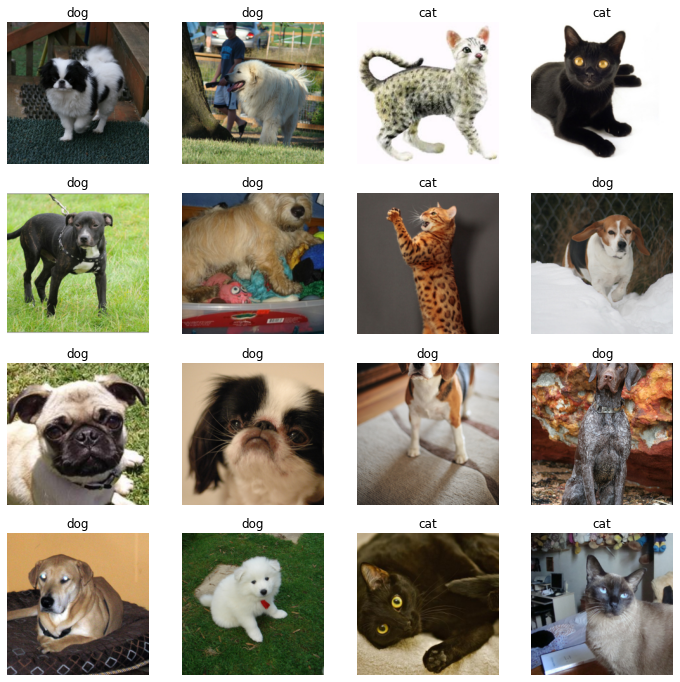

In [8]:
dls.show_batch(max_n=16)

In [11]:
# 여기까지 설치하고 커널을 재시작하면 정상적으로 모형이 만들어진다.
#metrics : 평가지표!!

In [9]:
learn= cnn_learner(dls,resnet34,metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\user/.cache\torch\hub\checkpoints\resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

C:\Users\user\anaconda3\envs\bda2021\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [12]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.139810,0.032168,0.013532,04:30


epoch,train_loss,valid_loss,error_rate,time
0,0.048791,0.012138,0.004736,01:45


In [17]:
learn.predict(files[555])

('dog', tensor(1), tensor([9.7912e-08, 1.0000e+00]))

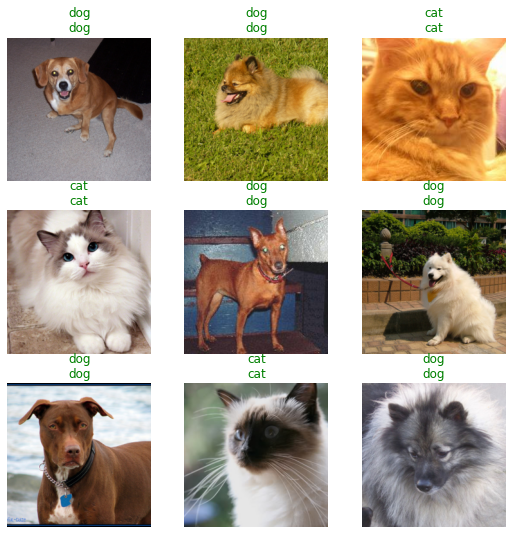

In [26]:
learn.show_results()

In [20]:
#오답분석

In [21]:
interp = Interpretation.from_learner(learn)

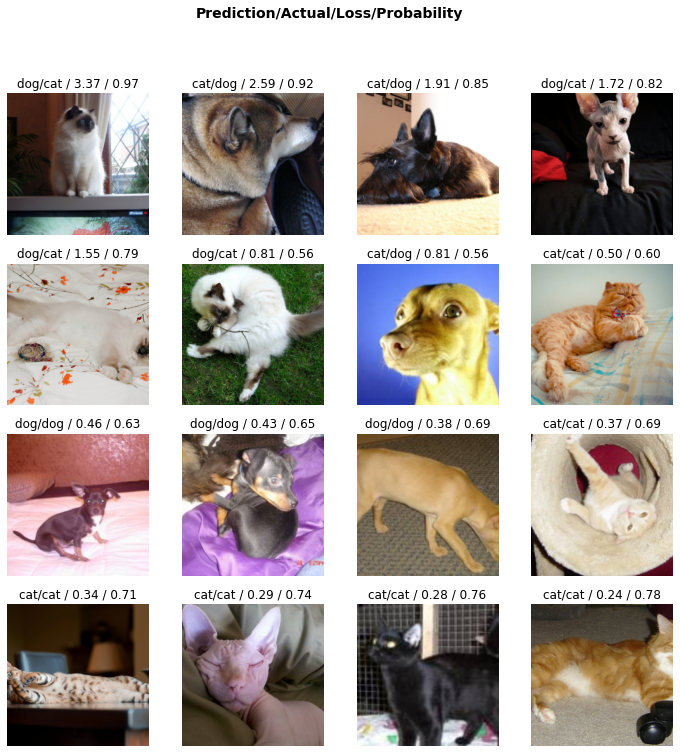

In [28]:
interp.plot_top_losses(16)